곡선에 의한 피팅

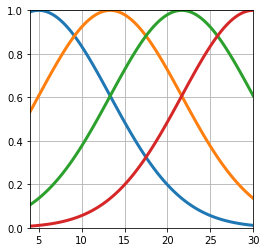

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed = 1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
prm_c = [170, 108, 0.2]
T = prm_c[0] - prm_c[1] * np.exp(-prm_c[2] * X) + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max = X_max, X_n = X_n, T=T)

def gauss (x, mu, s):
    return np.exp(-(x-mu)**2 / (2* s**2))

M=4
plt.figure(figsize=(4, 4))
mu=np.linspace(5, 30, M)
s=mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, linewidth = 3);

plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1, 2)
plt.show()

선형기저 함수모델

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


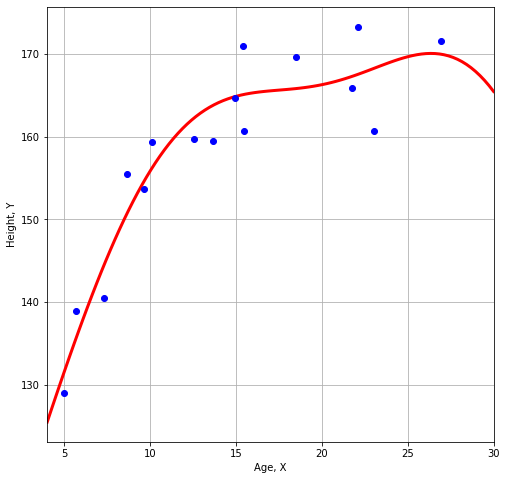

In [14]:
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse

def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b=np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, '-r', linewidth=3)
    plt.xlabel('Age, X')
    plt.ylabel('Height, Y')
    
plt.figure(figsize = (8, 8))
M = 4;
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+str(np.round(W, 1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

오버피팅문제

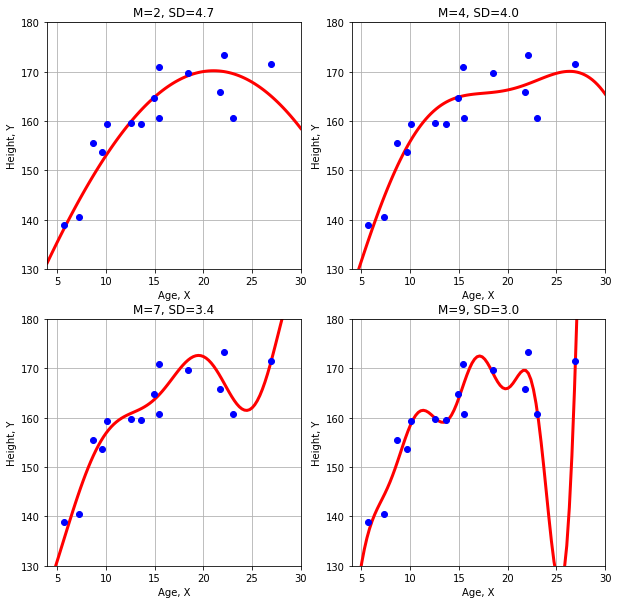

In [15]:
plt.figure(figsize = (10, 10))
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(2, 2, i+1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, 'bo')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))